In [19]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'C:/Users/Augus/Desktop/ca_ev_registration_population work.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   year state               county  \
0  2010    CA       Alameda County   
1  2010    CA        Amador County   
2  2010    CA  Contra Costa County   
3  2010    CA        Fresno County   
4  2010    CA      Humboldt County   

                                           zip_codes  population  \
0  [94501, 94502, 94536, 94537, 94538, 94539, 945...   1512986.0   
1  [95601, 95629, 95640, 95642, 95654, 95665, 956...     37886.0   
2  [94505, 94506, 94507, 94509, 94511, 94513, 945...   1052540.0   
3  [93210, 93234, 93242, 93602, 93605, 93606, 936...    932039.0   
4  [95501, 95502, 95503, 95511, 95514, 95518, 955...    135009.0   

   ev_registrations adopton rate  
0                20   0.0013219%  
1                 1   0.0026395%  
2                10   0.0009501%  
3                 2   0.0002146%  
4                 2   0.0014814%  


In [20]:
# Convert 'adopton rate' column to numeric by stripping the '%' sign and converting to float
df['adopton rate'] = df['adopton rate'].str.rstrip('%').astype('float') / 100

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Display the data types of each column
print("\nData types of each column:\n", df.dtypes)

Missing values in each column:
 year                 0
state                0
county              11
zip_codes           11
population          11
ev_registrations     0
adopton rate        11
dtype: int64

Data types of each column:
 year                  int64
state                object
county               object
zip_codes            object
population          float64
ev_registrations      int64
adopton rate        float64
dtype: object


In [21]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Display the cleaned DataFrame
print("Data after removing missing values:")
print(df_cleaned.head())

# Check for any remaining missing values
print("\nRemaining missing values in each column:\n", df_cleaned.isnull().sum())


Data after removing missing values:
   year state               county  \
0  2010    CA       Alameda County   
1  2010    CA        Amador County   
2  2010    CA  Contra Costa County   
3  2010    CA        Fresno County   
4  2010    CA      Humboldt County   

                                           zip_codes  population  \
0  [94501, 94502, 94536, 94537, 94538, 94539, 945...   1512986.0   
1  [95601, 95629, 95640, 95642, 95654, 95665, 956...     37886.0   
2  [94505, 94506, 94507, 94509, 94511, 94513, 945...   1052540.0   
3  [93210, 93234, 93242, 93602, 93605, 93606, 936...    932039.0   
4  [95501, 95502, 95503, 95511, 95514, 95518, 955...    135009.0   

   ev_registrations  adopton rate  
0                20      0.000013  
1                 1      0.000026  
2                10      0.000010  
3                 2      0.000002  
4                 2      0.000015  

Remaining missing values in each column:
 year                0
state               0
county              0
z

In [22]:
# Group by year to calculate total EV registrations per year
total_ev_registrations_per_year = df_cleaned.groupby('year')['ev_registrations'].sum().reset_index()

# Display the total EV registrations per year
print("Total EV Registrations Per Year:")
print(total_ev_registrations_per_year)

Total EV Registrations Per Year:
    year  ev_registrations
0   2010               743
1   2011              5662
2   2012             18054
3   2013             51849
4   2014            107983
5   2015            165121
6   2016            229005
7   2017            320644
8   2018            444612
9   2019            555347
10  2020            623919


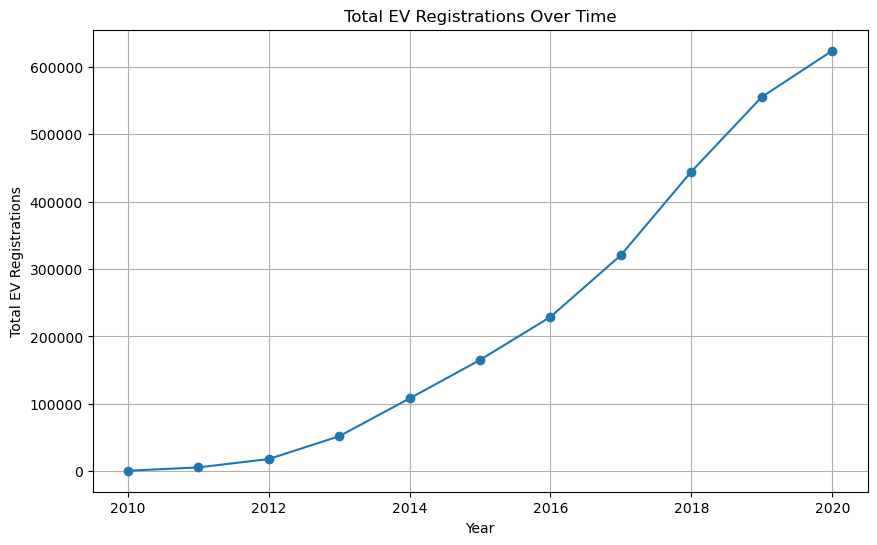

In [23]:
import matplotlib.pyplot as plt

# Plot total EV registrations over time
plt.figure(figsize=(10, 6))
plt.plot(total_ev_registrations_per_year['year'], total_ev_registrations_per_year['ev_registrations'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total EV Registrations')
plt.title('Total EV Registrations Over Time')
plt.grid(True)
plt.show()

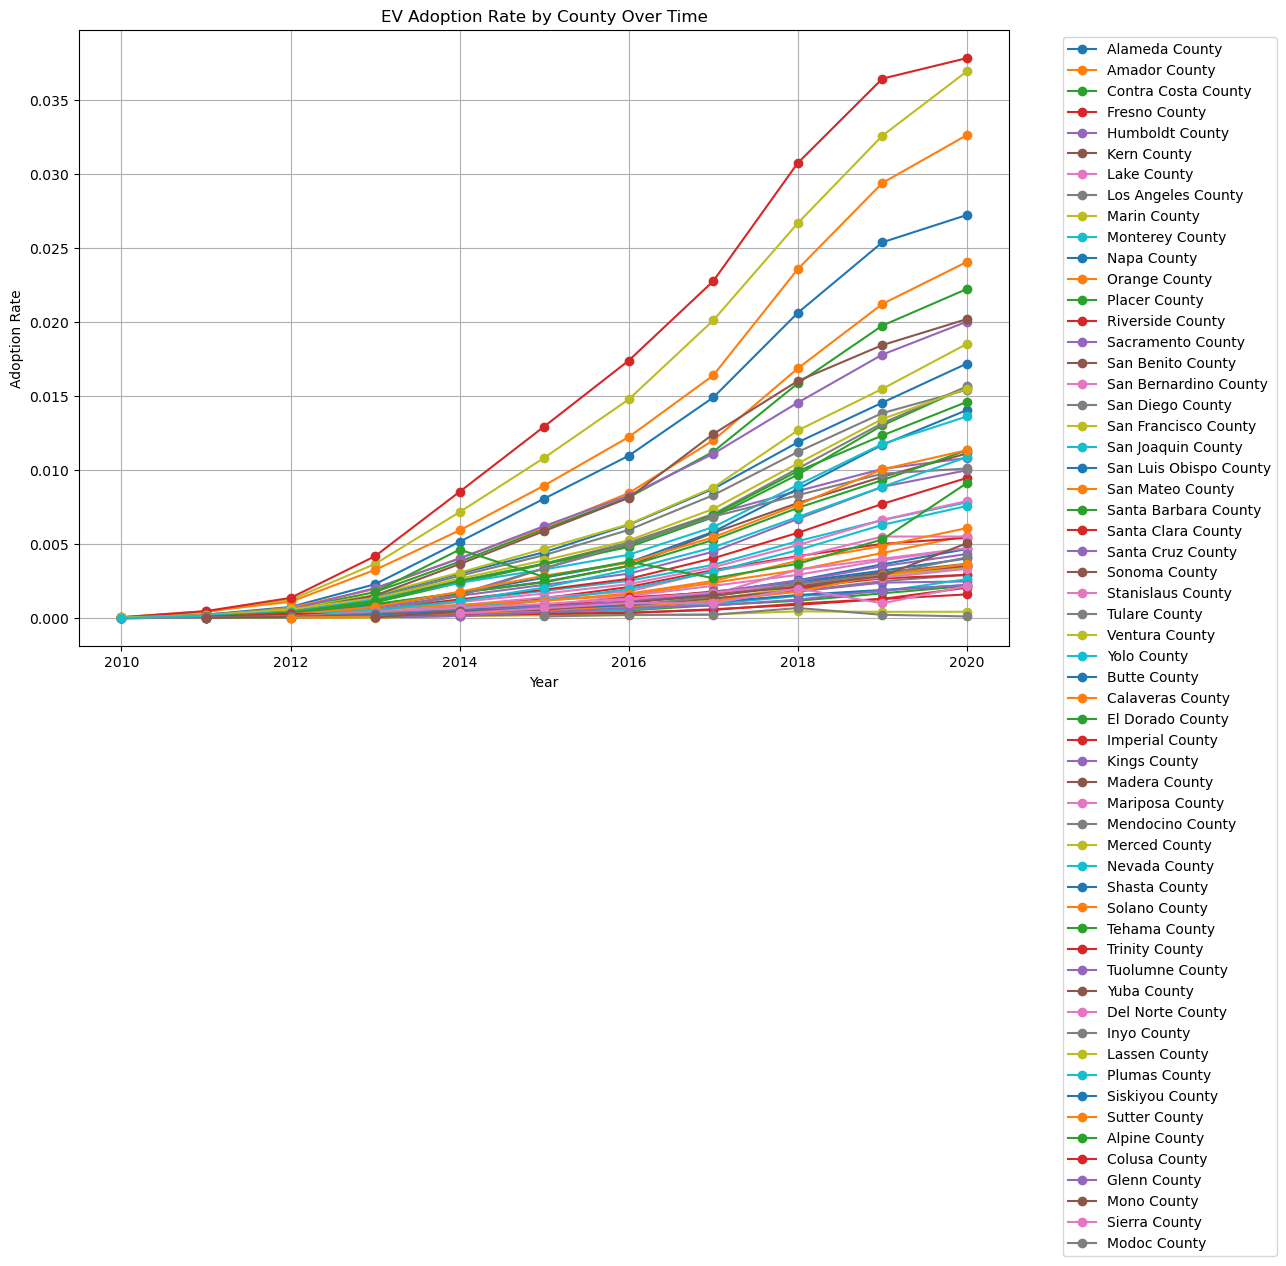

In [24]:
# Set the plot size
plt.figure(figsize=(12, 8))

# Group data by county and year, then calculate the mean adoption rate
counties = df_cleaned['county'].unique()
for county in counties:
    county_data = df_cleaned[df_cleaned['county'] == county]
    plt.plot(county_data['year'], county_data['adopton rate'], marker='o', linestyle='-', label=county)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Adoption Rate')
plt.title('EV Adoption Rate by County Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust the legend to be outside the plot
plt.grid(True)
plt.show()

In [25]:
# Calculate the standard deviation of the adoption rate for each county
std_dev_by_county = df_cleaned.groupby('county')['adopton rate'].std().reset_index()

# Set a threshold for identifying "sporadic" counties (mean + standard deviation)
std_threshold = std_dev_by_county['adopton rate'].mean() + std_dev_by_county['adopton rate'].std()

# Identify counties with standard deviation above the threshold
sporadic_counties = std_dev_by_county[std_dev_by_county['adopton rate'] > std_threshold]['county'].tolist()

# Print the list of counties with drastic changes
print("Counties with drastic changes in EV adoption rates:")
for county in sporadic_counties:
    print(county)


Counties with drastic changes in EV adoption rates:
Alameda County
Contra Costa County
Marin County
Orange County
San Mateo County
Santa Clara County
Santa Cruz County
Sonoma County


In [29]:
# Initialize a DataFrame to store the profit model results
profit_data = {
    'Year': [],
    'County': [],
    'EVs Sold': [],
    'Revenue ($)': [],
    'Total Costs ($)': [],
    'Profit ($)': []
}

# Calculate profit for each county and year
for _, row in df_cleaned.iterrows():
    year = row['year']
    county = row['county']
    adoption_rate = row['adopton rate']
    population = row['population']
    evs_sold = population * adoption_rate
    revenue = evs_sold * revenue_per_ev
    variable_costs = evs_sold * production_cost_per_ev
    total_costs = fixed_costs + variable_costs
    profit = revenue - total_costs
    
    # Store results in the data dictionary
    profit_data['Year'].append(year)
    profit_data['County'].append(county)
    profit_data['EVs Sold'].append(evs_sold)
    profit_data['Revenue ($)'].append(revenue)
    profit_data['Total Costs ($)'].append(total_costs)
    profit_data['Profit ($)'].append(profit)

# Convert the profit data dictionary to a DataFrame
df_profit = pd.DataFrame(profit_data)

# Display the profit model DataFrame
print("Profit Model:")
print(df_profit.head())


Profit Model:
   Year               County   EVs Sold   Revenue ($)  Total Costs ($)  \
0  2010       Alameda County  20.000162  800006.47736     1.060000e+07   
1  2010        Amador County   1.000001   40000.03880     1.003000e+07   
2  2010  Contra Costa County  10.000183  400007.30160     1.030001e+07   
3  2010        Fresno County   2.000156   80006.22776     1.006000e+07   
4  2010      Humboldt County   2.000023   80000.93304     1.006000e+07   

     Profit ($)  
0 -9.799998e+06  
1 -9.990000e+06  
2 -9.899998e+06  
3 -9.979998e+06  
4 -9.980000e+06  


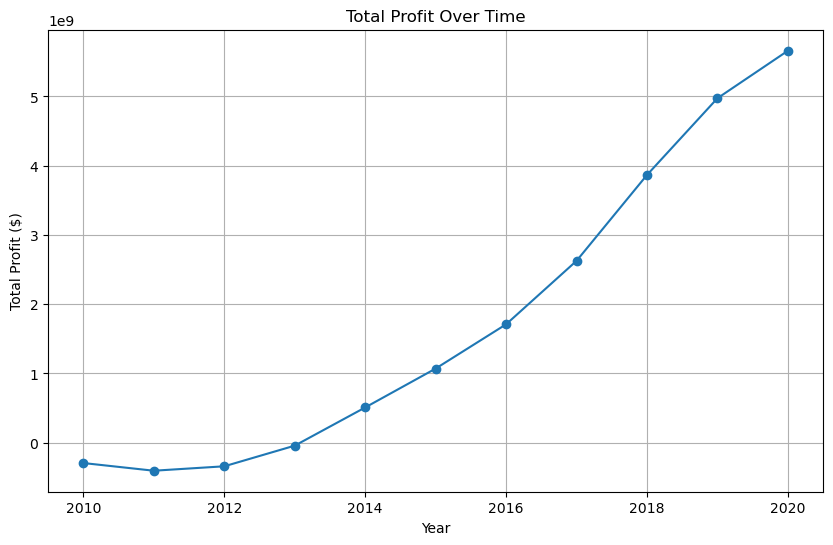

In [27]:
import matplotlib.pyplot as plt

# Calculate total profit per year
total_profit_per_year = df_profit.groupby('Year')['Profit ($)'].sum().reset_index()

# Plot total profit over time
plt.figure(figsize=(10, 6))
plt.plot(total_profit_per_year['Year'], total_profit_per_year['Profit ($)'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Profit ($)')
plt.title('Total Profit Over Time')
plt.grid(True)
plt.show()


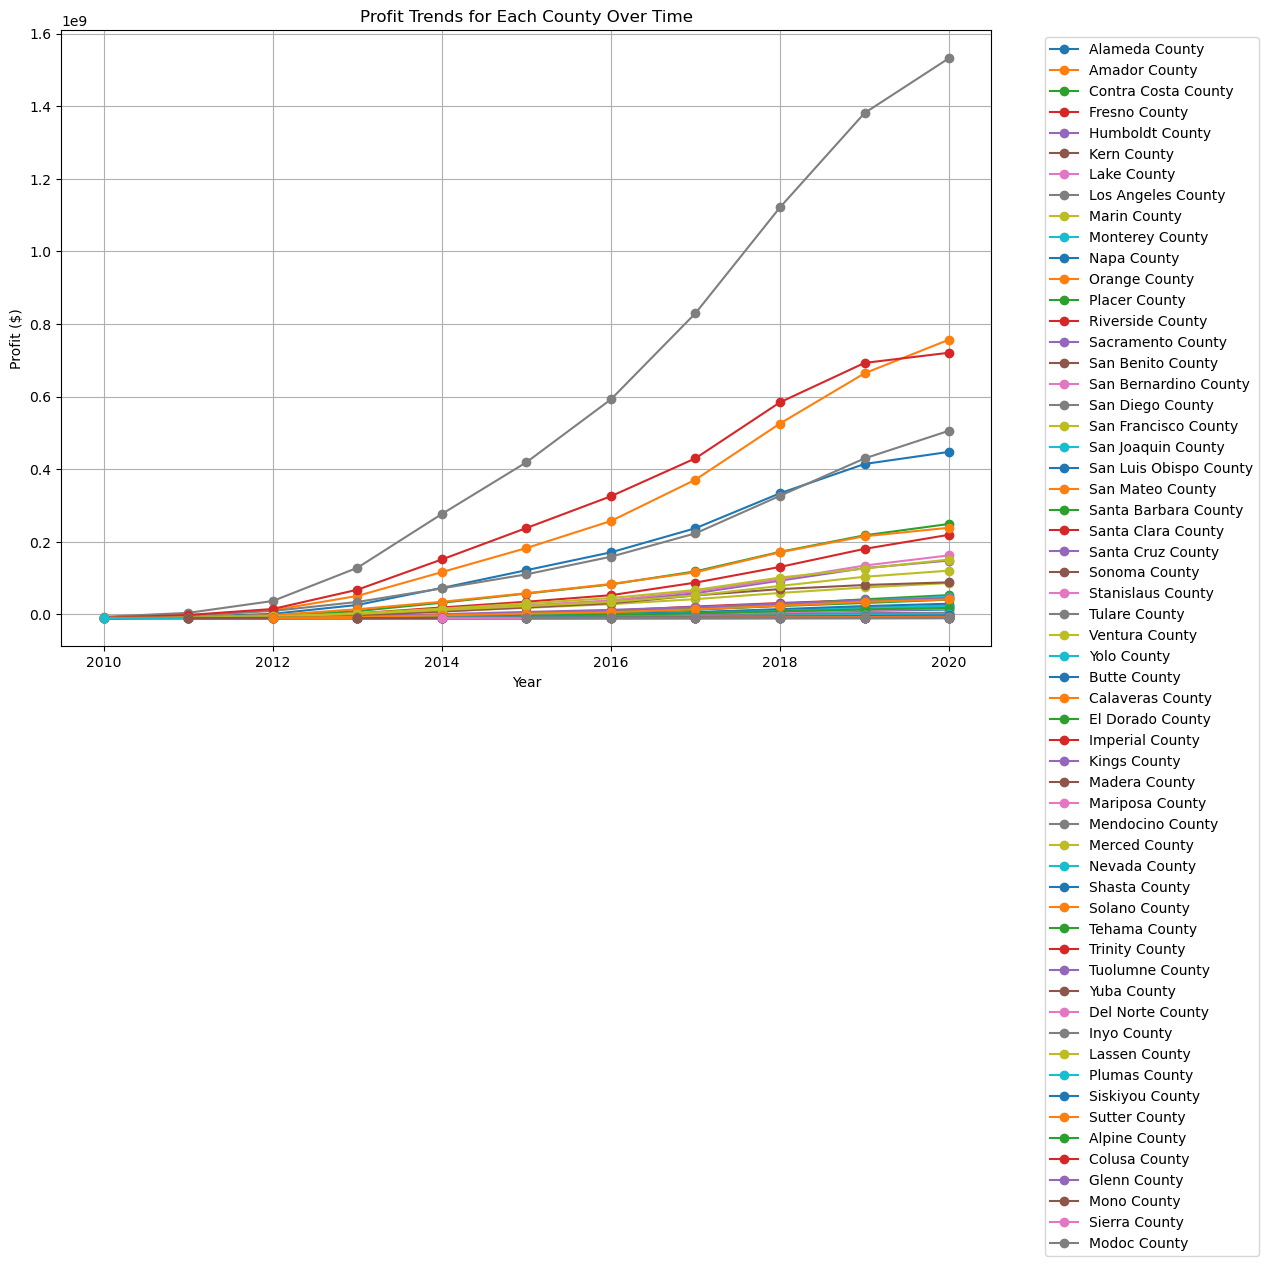

In [28]:
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(12, 8))

# Get a list of unique counties
counties = df_profit['County'].unique()

# Plot the profit trend for each county
for county in counties:
    county_data = df_profit[df_profit['County'] == county]
    plt.plot(county_data['Year'], county_data['Profit ($)'], marker='o', linestyle='-', label=county)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Profit ($)')
plt.title('Profit Trends for Each County Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot for clarity
plt.grid(True)
plt.show()